0


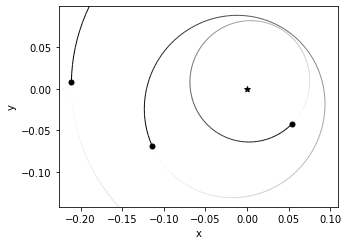

In [34]:
from spock import FeatureClassifier
import rebound
import math
import numpy as np
starData = [1.1, 1.52]
feature_model = FeatureClassifier()
sim = rebound.Simulation()
sim.add(m=starData[0])

sim.add(m = 4.97e-6, r = .011487, a = .073127, e = .131461, inc = .143639, Omega = 4.270226, omega = .086899, M = 1.024758)
sim.add(m = 1.56e-5, r = .020517, a = .110634, e = .234651, inc = .037356, Omega = 3.301407, omega = 3.943074, M = 2.492365)
sim.add(m = 6.89e-6, r = .013821, a = .217526, e = .037377, inc = .045645, Omega = .363677, omega = 3.453097, M = 5.615575)

#sim.add(m = 4.97e-6, r = .011487, a = .073127, e = .0, inc = .143639, Omega = 4.270226, omega = .086899, M = 1.024758)
#sim.add(m = 1.56e-5, r = .020517, a = .110634, e = .0, inc = .037356, Omega = 3.301407, omega = 3.943074, M = 2.492365)
#sim.add(m = 6.89e-6, r = .013821, a = .217526, e = .037377, inc = .045645, Omega = .363677, omega = 3.453097, M = 5.615575)


sim.move_to_com()
#sim.status()
rebound.OrbitPlot(sim)
print(feature_model.predict_stable(sim))

In [35]:
def petrovitchMetric(sim):
    MetricSim=sim
    metrics = []
    l=MetricSim.N
    for n in range(l-2):
        a1=MetricSim.particles[n+1].calculate_orbit(sim.particles[0]).a
        a2=MetricSim.particles[n+2].calculate_orbit(sim.particles[0]).a
        e1=MetricSim.particles[n+1].calculate_orbit(sim.particles[0]).e
        e2=MetricSim.particles[n+2].calculate_orbit(sim.particles[0]).e
        mu1=MetricSim.particles[n+1].m/MetricSim.particles[0].m
        mu2=MetricSim.particles[n+2].m/MetricSim.particles[0].m
        mu=max(mu1,mu2)
        metricn=((a2*(1-e2))/(a1*(1+e1))/(2.4*(mu**(1/3))*((a2/a1)**(1/2))+1.15))
        metrics.append(metricn)
    
    minMetric = min(metrics)
    planet = metrics.index(minMetric) + 1
    
    return minMetric,planet
## The higher the returned value the more stable the system however values below 1 are determined to be unstable by this metric

def HLMetric(sim):
    MetricSim=sim
    metric= 0
    planet=0
    l=MetricSim.N
    for n in range(l-2):
        a1=MetricSim.particles[n+1].calculate_orbit(sim.particles[0]).a
        a2=MetricSim.particles[n+2].calculate_orbit(sim.particles[0]).a
        e1=MetricSim.particles[n+1].calculate_orbit(sim.particles[0]).e
        e2=MetricSim.particles[n+2].calculate_orbit(sim.particles[0]).e
        mu1=MetricSim.particles[n+1].m/MetricSim.particles[0].m
        mu2=MetricSim.particles[n+2].m/MetricSim.particles[0].m
        ecross= (a2-a1)/a1
        ecrit=ecross/(2**(1/2))*math.exp(-2.2*((mu1+mu2)**(1/3))*((a2/(a2-a1))**(4/3)))
        
        #Calculate the ratio of the planet's eccentricity to the critical eccentricity
        metricn = e1/ecrit
        metricnp1 = e2/ecrit
        
        #Return the planet with the highest ratio which will be the most unstable of the system
        if max(metricn,metricnp1) > metric:
            metric = max(metricn,metricnp1)
            if metric == metricn:
                planet = n+1 #Ensure that 1 identifies the innermost planet, not 0
            else:
                planet = n+2
        
    return metric,planet



In [36]:
print(petrovitchMetric(sim))
print(HLMetric(sim))

(0.837825306304547, 1)
(0.828294212235921, 2)
